In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf

import pixiedust
from functools import partial
import gin
import itertools
import multiprocessing
import pickle

from synthetic_data import xs_e, ys_e, Q1, xs, ys, A

# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

Pixiedust database opened successfully


In [2]:
# hyperparameters setup
common = {
    'build_decoder_model.init_fp_dist': None,
    'build_feature_model.init_fp_dist': None,
    'build_reconstructor_model.init_fp_dist': None,
    'step.l_rec_coeff': 5,
    'get_results.epochs': 1000,
    'get_results.batch_size': 64,
    'step.optimizer': tf.keras.optimizers.Adam(lr=0.001),
    'get_results.step': 'step',
}

sweep_00 = {
    'step.l_rec_coeff': [1, 10],
    'get_results.batch_size': [256, 512],
    'repetitions': range(2),
    'name': ['sweep-00'],
}

sweep_01 = {
    'step.l_rec_coeff': np.logspace(-2, 2, 10),
    'get_results.batch_size': [64, 128, 256, 512],
    'repetitions': range(5),
    'name': ['sweep-01'],
}

sweep_02 = {
    'step.l1_coeff': np.logspace(-5, 2, 10),
    'step.l_rec_coeff': np.logspace(0, 1, 3),
    'get_results.batch_size': [128],
    'repetitions': range(5),
    'name': ['sweep-02'],
}

# number of processes
n_cpus = 5

sweep = sweep_02
assert 'name' in sweep
assert 'repetitions' in sweep
assert len(sweep['name']) == 1

In [3]:
# all parameters as a list
all_params = list(itertools.product(*[[(x, z) for z in y] for x, y in sweep.items()]))
all_params = [dict(t) for t in all_params]
print("Total runs: %d on %d CPUs" % (len(all_params), n_cpus))

Total runs: 150 on 5 CPUs


In [4]:
def set_params(param, synthetic_experiment_module):
    """Set params via gin."""
    # binding common params
    for k, v in common.items():
        if k == 'get_results.step':
            v = getattr(synthetic_experiment_module, v)
        gin.bind_parameter(k, v)
    
    for k, v in param.items():
        if k == 'repetitions' or k == 'name': continue
        gin.bind_parameter(k, v)

def process_i(i):
    """Process i'th parameter."""
    param = all_params[i]
    print(i, param)
    import synthetic_experiment
    
    set_params(param, synthetic_experiment)
    
    return synthetic_experiment.get_results(xs_e, ys_e, Q1)

In [ ]:
# RUNNING the experiment
pool = multiprocessing.Pool(n_cpus)
results = pool.map(process_i, range(len(all_params)))

8 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}
32 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}
0 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}
16 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}
24 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}




17 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}

1 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}




33 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


9 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}
25 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}





2 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}
34 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}
18 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



26 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



10 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}





35 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}
19 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}
3 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



11 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



27 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



36 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



20 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



4 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



12 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



28 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



37 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



21 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



5 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



13 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



29 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



38 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



22 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



6 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}




14 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}
30 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



39 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



23 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



7 {'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}




31 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}
15 {'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



40 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



48 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



56 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



64 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



72 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



41 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



49 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



57 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



65 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



73 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



42 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



50 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



58 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}




66 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}
74 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



43 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



51 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



59 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



67 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



75 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



44 {'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



52 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



60 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}




68 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}
76 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



45 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



53 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



61 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



69 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



77 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



46 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



54 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



62 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



70 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



78 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



47 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



55 {'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



63 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



71 {'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



79 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}




80 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


88 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



96 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



104 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



112 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



81 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



89 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



97 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



105 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



113 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



82 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



90 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



98 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



106 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



114 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



83 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



91 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



99 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



107 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



115 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



84 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



92 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



100 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



108 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



116 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



85 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



93 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



101 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



109 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



117 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



86 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



94 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



102 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



110 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



118 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



87 {'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



95 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



103 {'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



111 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



119 {'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



120 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



128 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



136 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



144 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}




121 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



129 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



137 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



145 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



122 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



130 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



138 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



146 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



123 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



131 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



139 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



147 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



124 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



132 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



140 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



148 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



125 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



133 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}



141 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



149 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



126 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}



134 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}



142 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}




127 {'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}



135 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}



143 {'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


In [12]:
def process_results(res, name):
    """Process experimental results."""
    print(name)
    losses, distances, weights = res
    # Plotting everything
    fig = plt.figure(figsize=(9, 4))
    fig.patch.set_facecolor('lightgreen')

    N_plots = len(losses) + 1

    plt.subplot(1, N_plots, 1)
    plt.title("d(M, A)")
    plt.plot(distances, color='red')
    plt.axhline(0, ls='--', c='black')

    colormap = ['green', 'blue', 'yellow']

    # model losses
    for i, key in enumerate(losses.keys()):
        plt.subplot(1, N_plots, 2 + i)
        plt.title(key)
        plt.plot(losses[key], c=colormap[i])
        plt.axhline(0, ls='--', c='black')

    #plt.legend()
    plt.show()

In [13]:
param_1 = 'step.l_rec_coeff'
param_2 = 'step.l1_coeff'
assert param_1 in sweep and param_2 in sweep
lst_of_params = list(sweep.keys())
lst_of_params.remove(param_1)
lst_of_params.remove(param_2)
lst_of_params.remove('name')
print("Averaging over %s" % str(lst_of_params))

Averaging over ['get_results.batch_size', 'repetitions']


In [14]:
def filter_results(**kwargs):
    """Get results corresponding to constraints."""
    result = []
    for p, r in zip(all_params, results):
        include = True
        for k, v in kwargs.items():
            if p[k] != v: include = False
        if include:
            result.append((p, r))
    return result

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


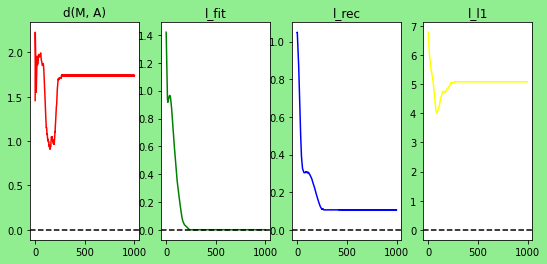

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


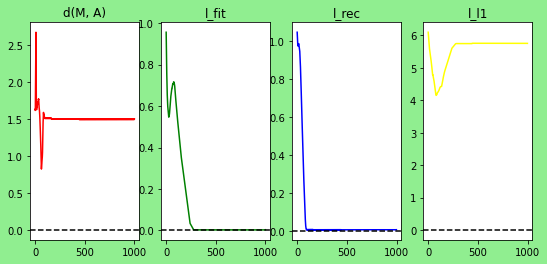

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


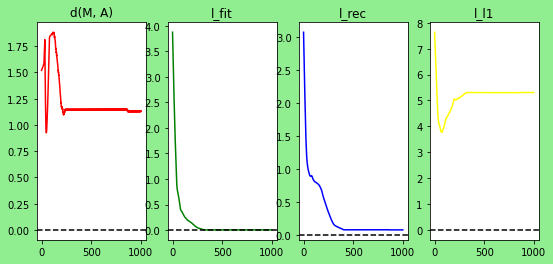

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


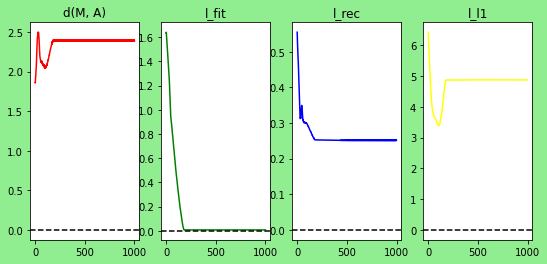

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


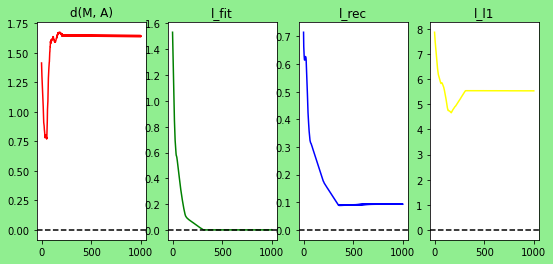

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


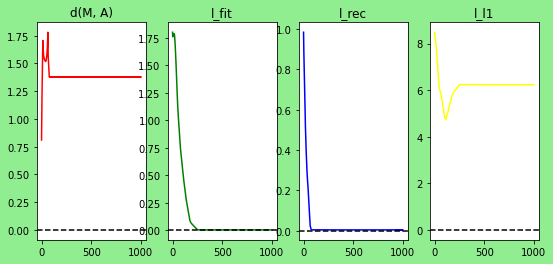

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


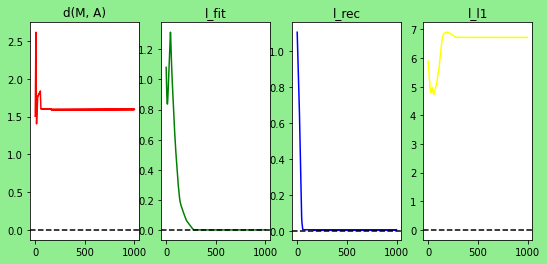

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


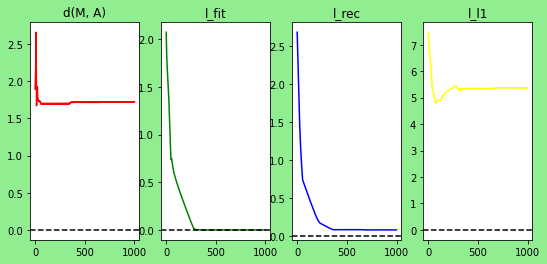

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


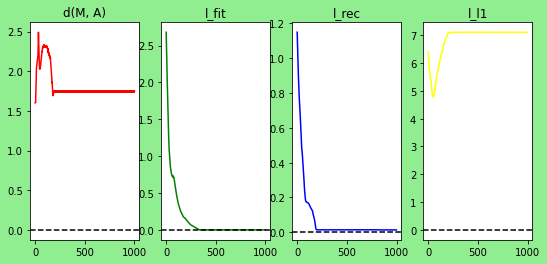

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


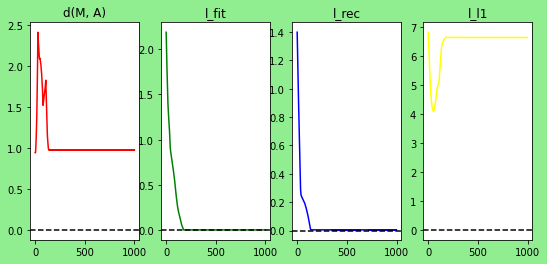

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


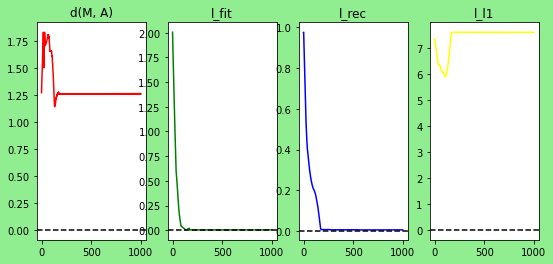

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


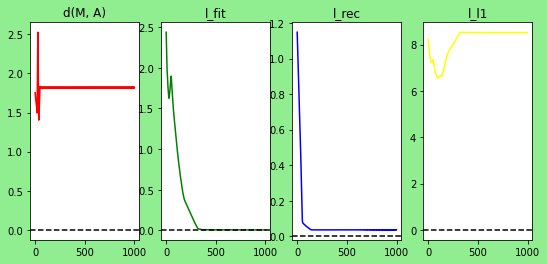

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


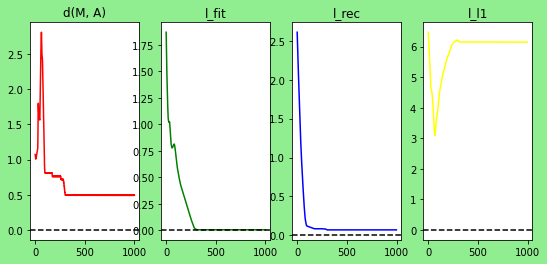

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


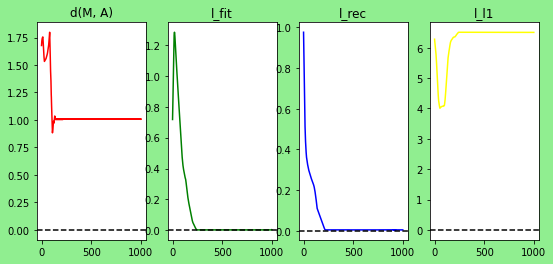

{'step.l1_coeff': 1e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


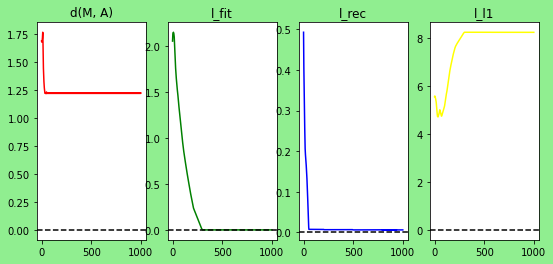

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


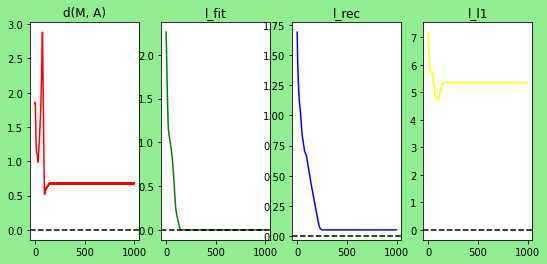

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


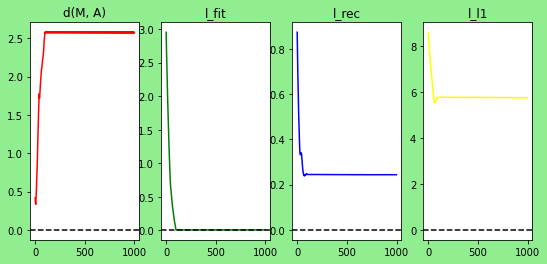

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


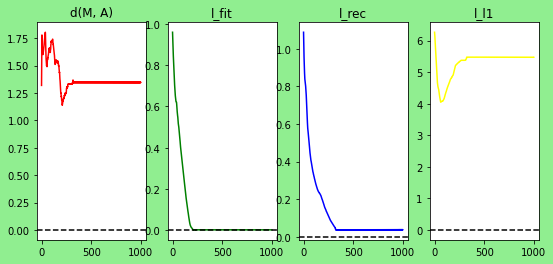

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


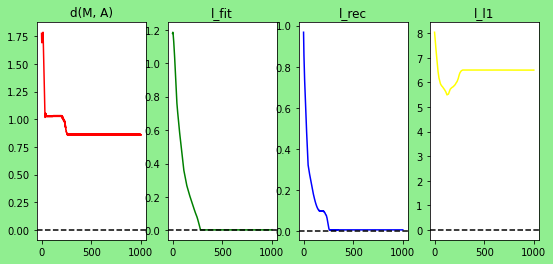

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


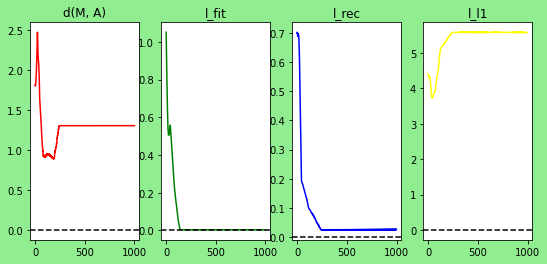

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


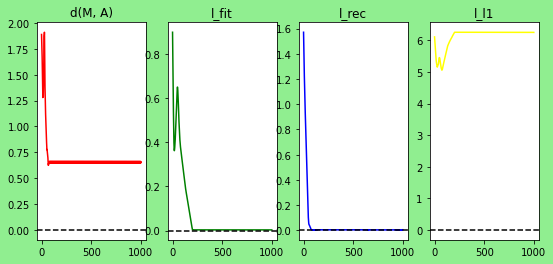

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


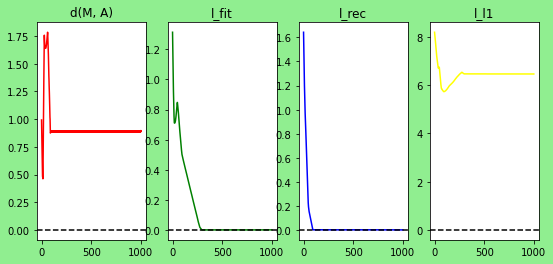

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


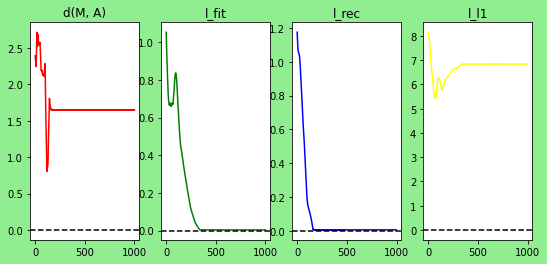

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


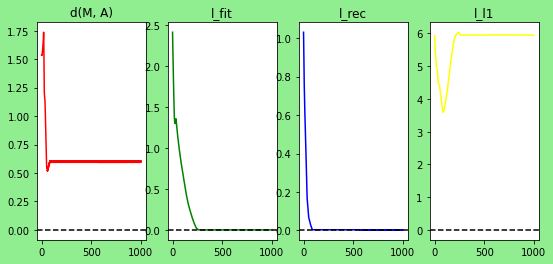

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


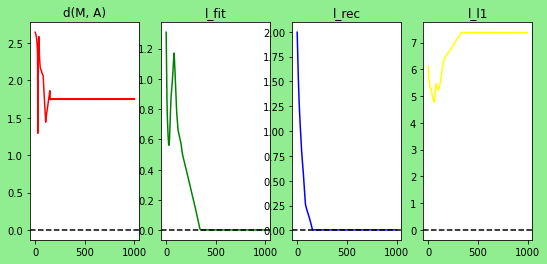

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


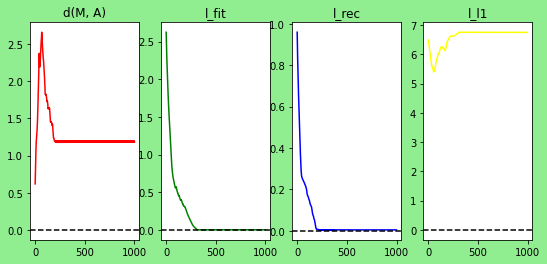

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


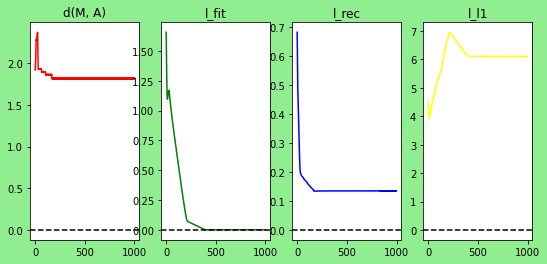

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


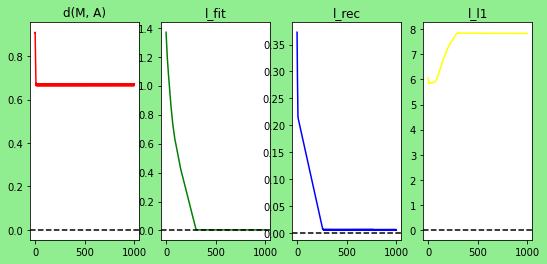

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


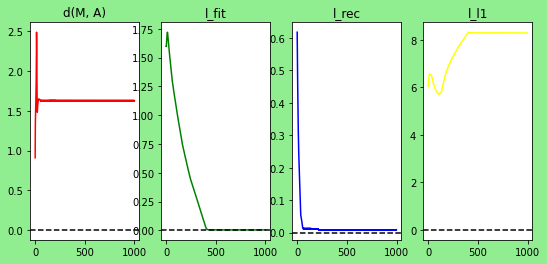

{'step.l1_coeff': 5.994842503189409e-05, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


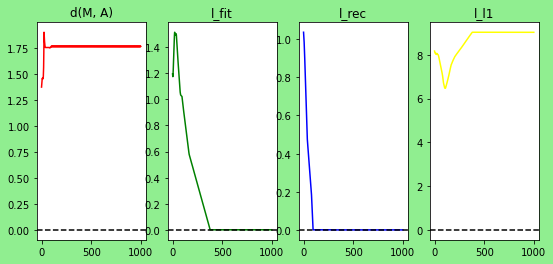

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


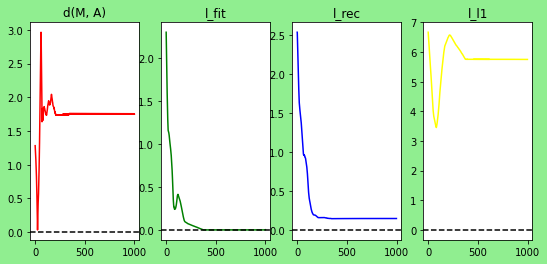

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


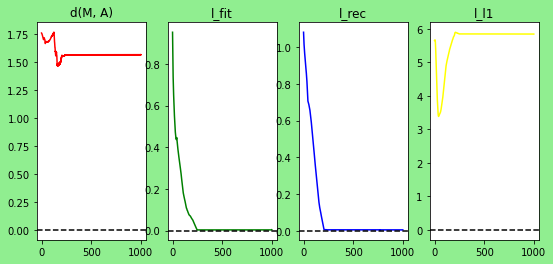

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


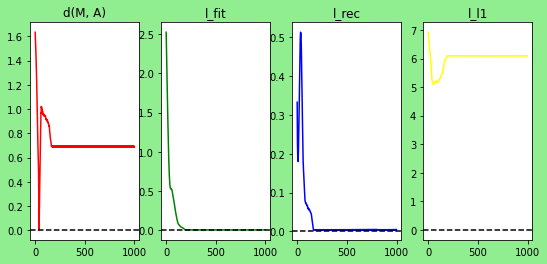

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


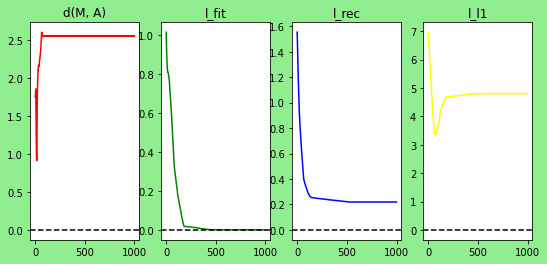

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


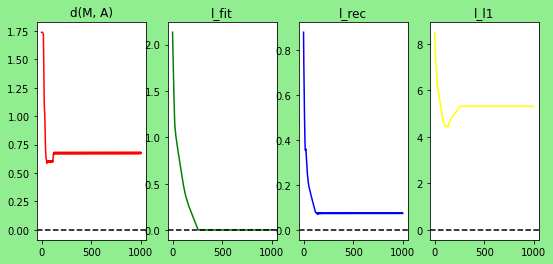

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


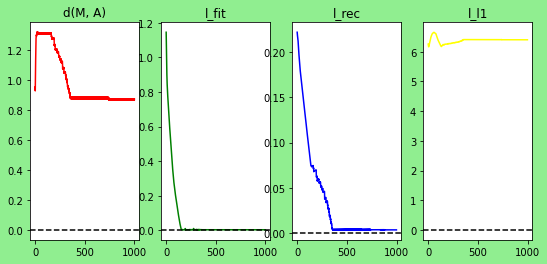

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


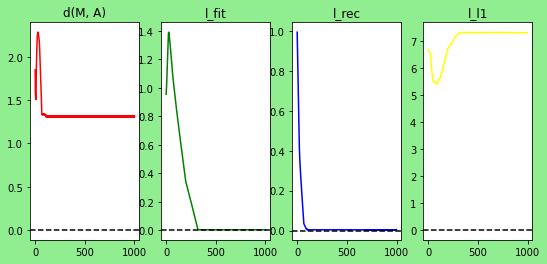

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


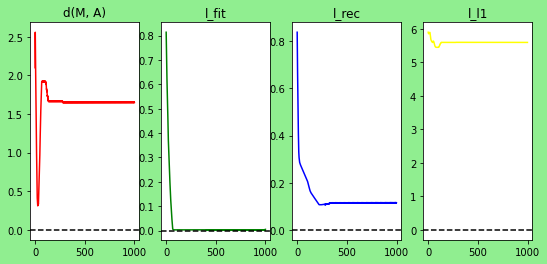

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


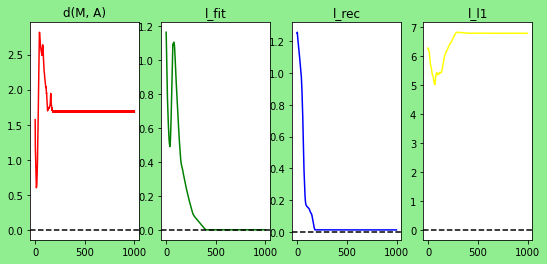

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


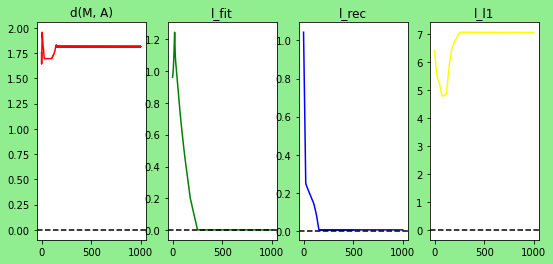

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


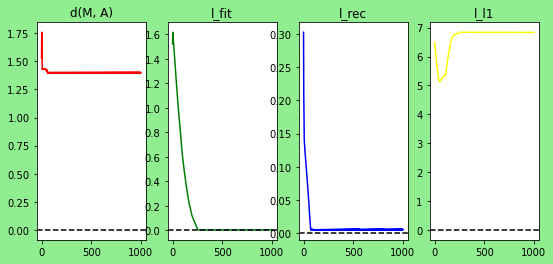

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


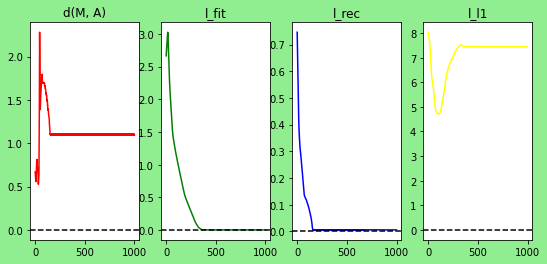

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


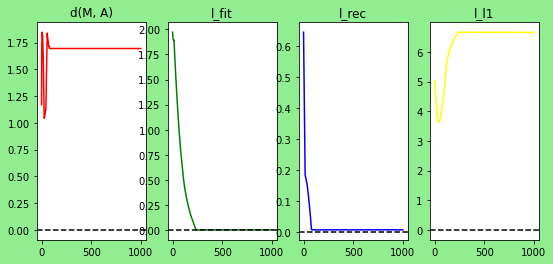

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


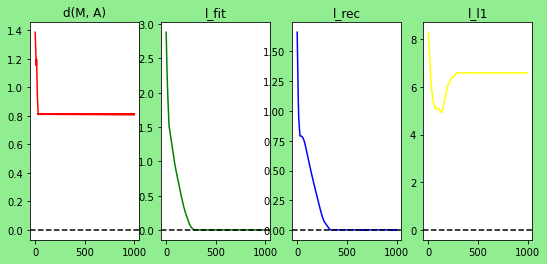

{'step.l1_coeff': 0.00035938136638046257, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


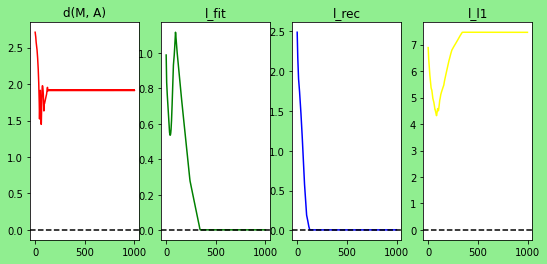

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


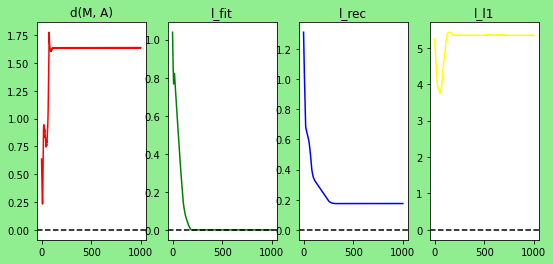

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


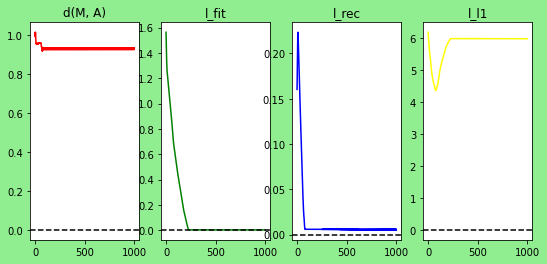

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


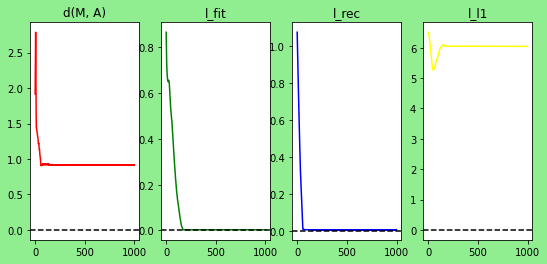

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


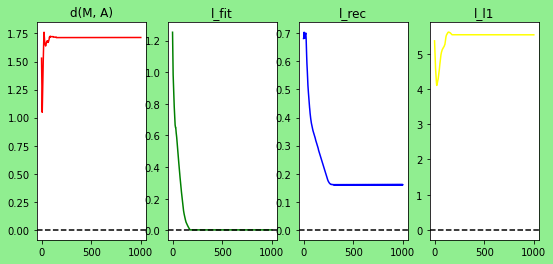

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


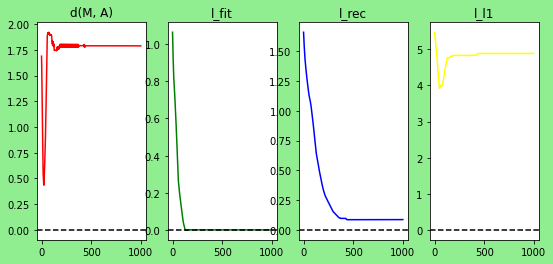

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


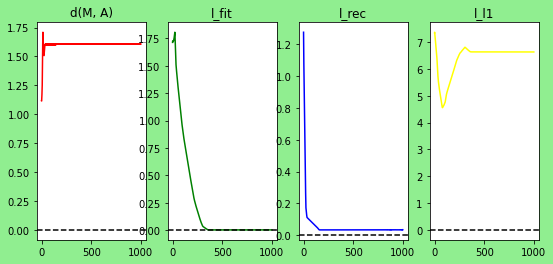

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


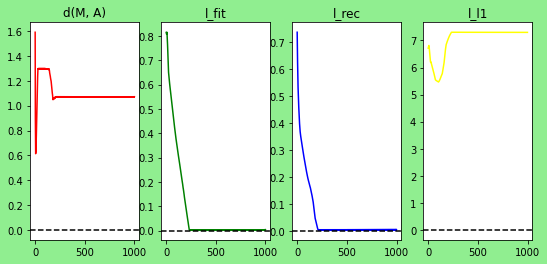

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


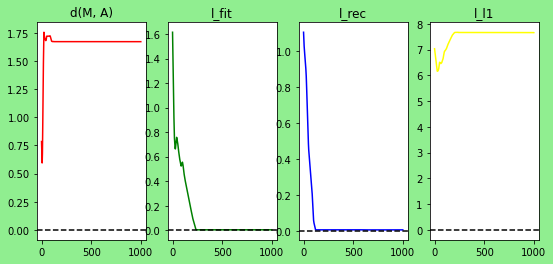

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


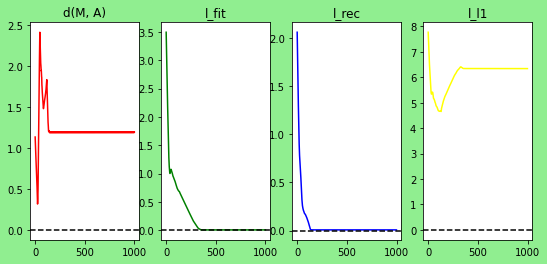

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


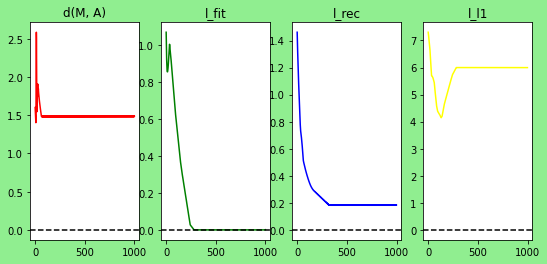

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


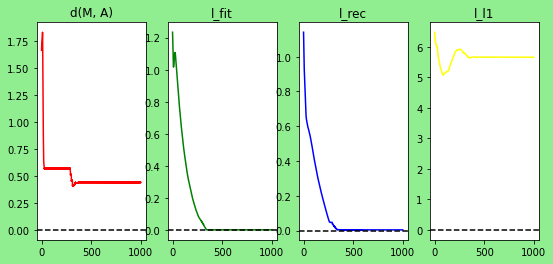

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


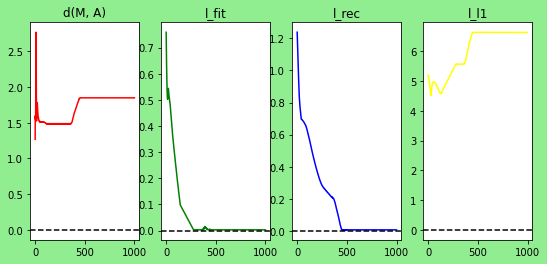

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


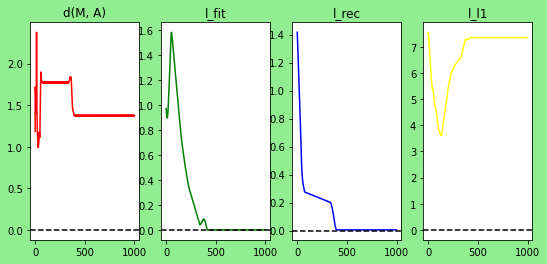

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


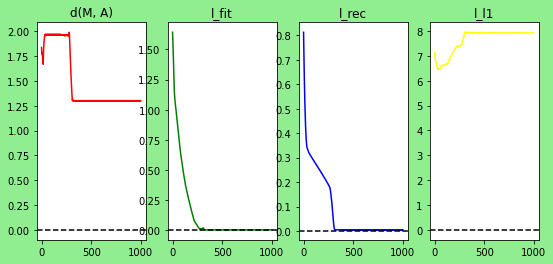

{'step.l1_coeff': 0.0021544346900318843, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


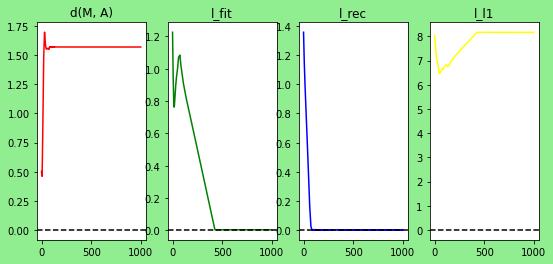

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


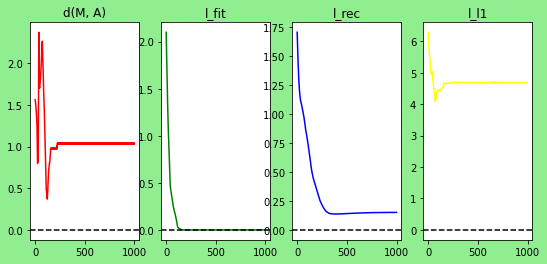

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


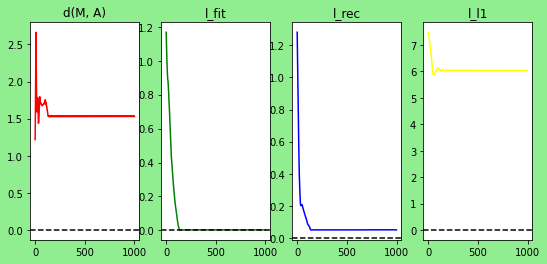

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


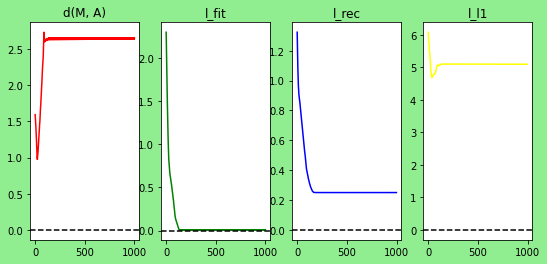

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


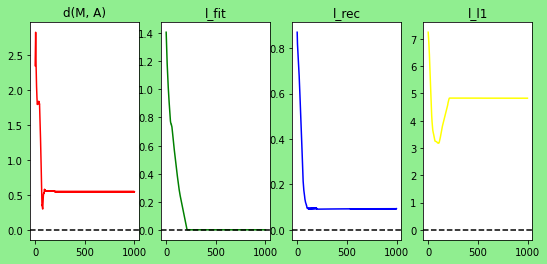

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


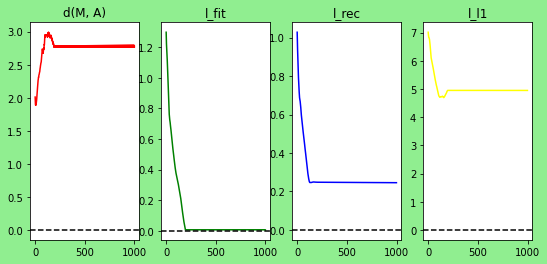

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


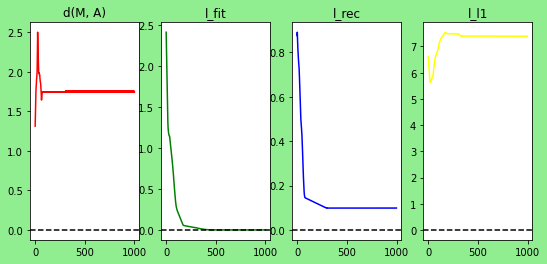

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


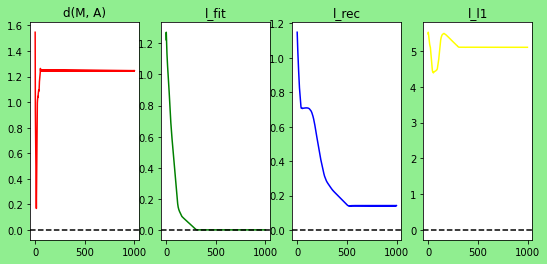

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


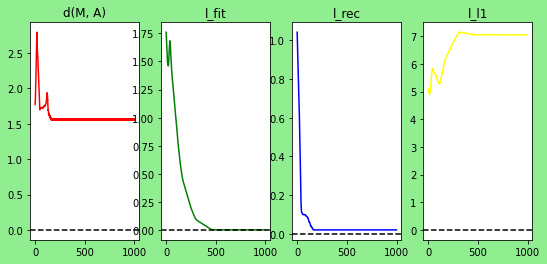

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


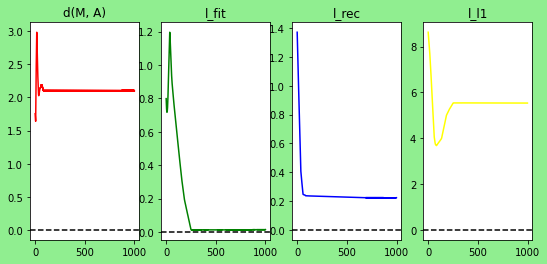

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


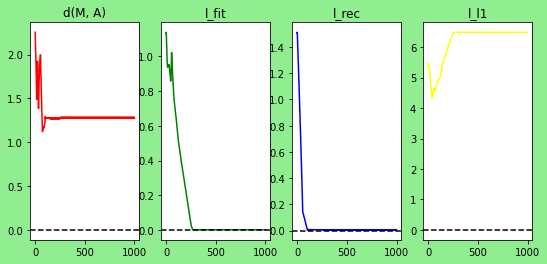

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


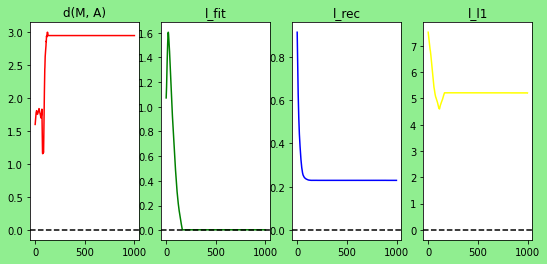

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


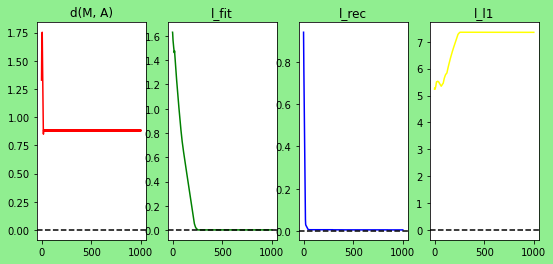

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


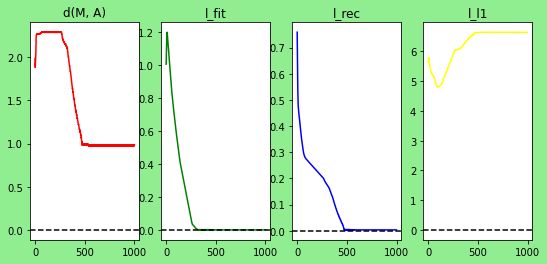

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


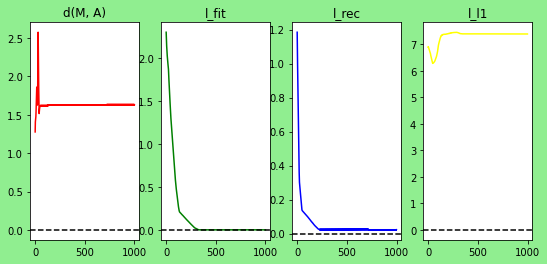

{'step.l1_coeff': 0.01291549665014884, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


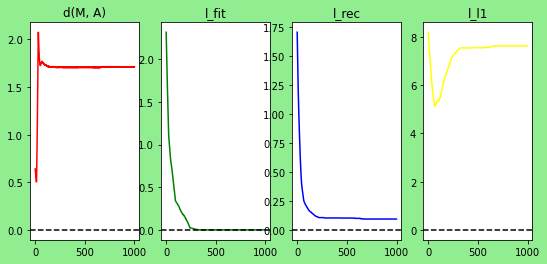

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


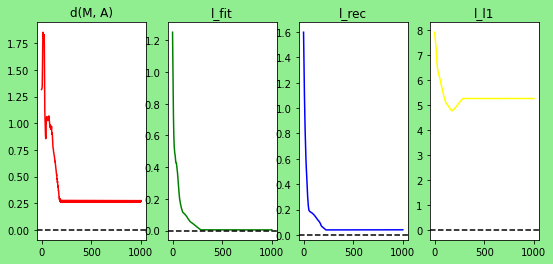

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


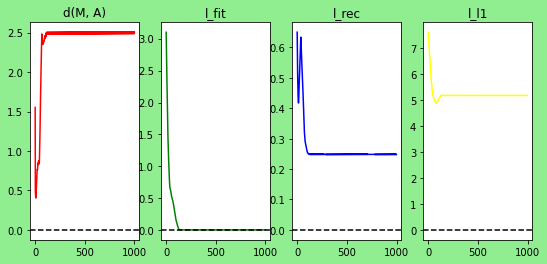

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


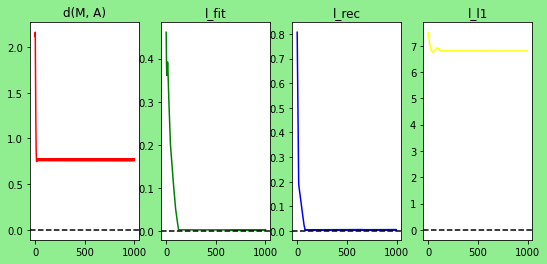

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


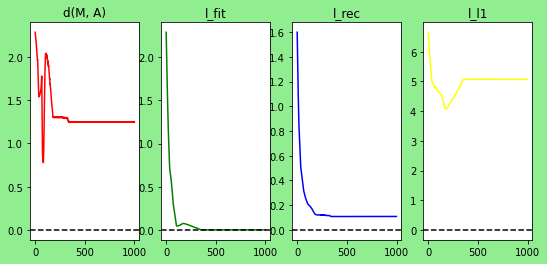

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


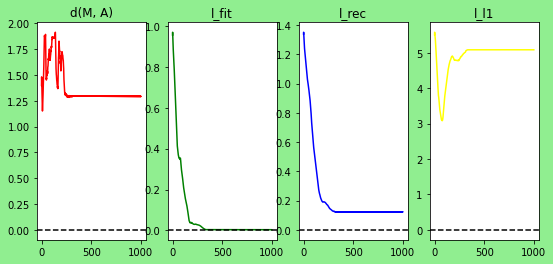

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


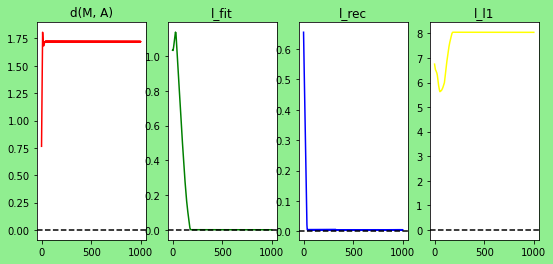

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


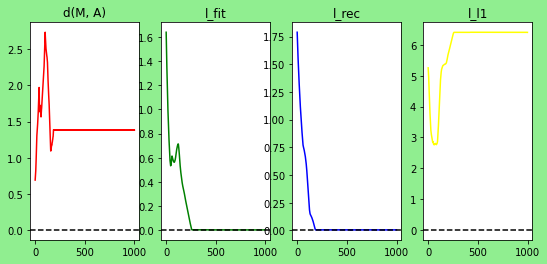

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


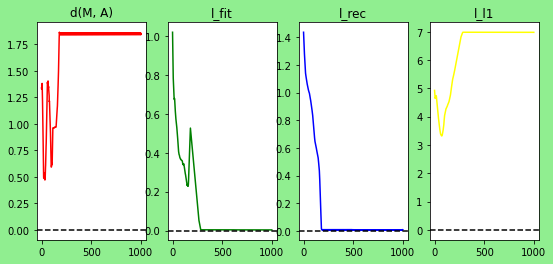

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


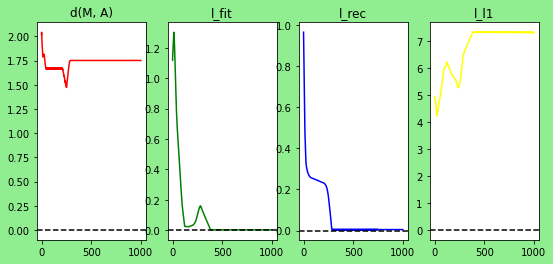

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


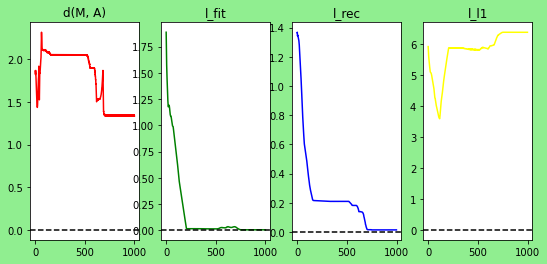

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


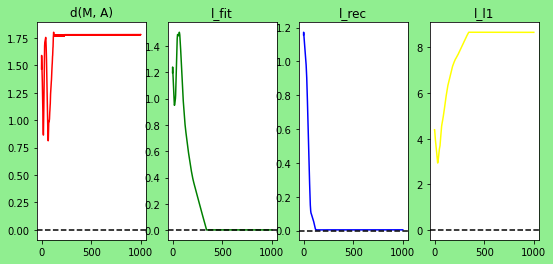

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


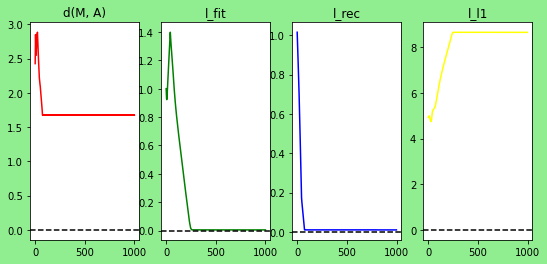

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


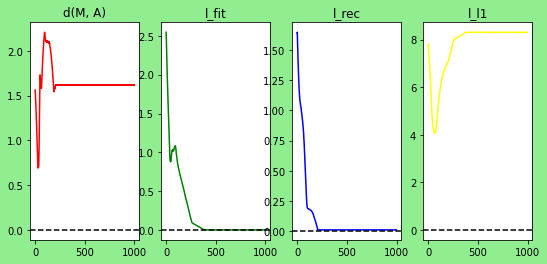

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


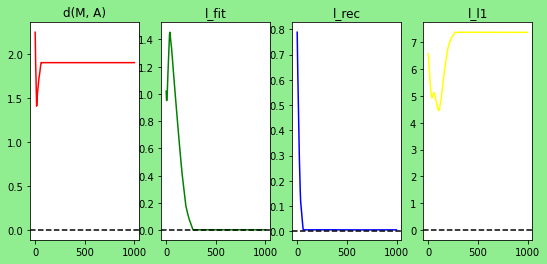

{'step.l1_coeff': 0.0774263682681127, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


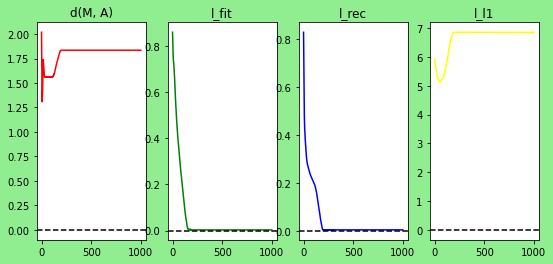

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


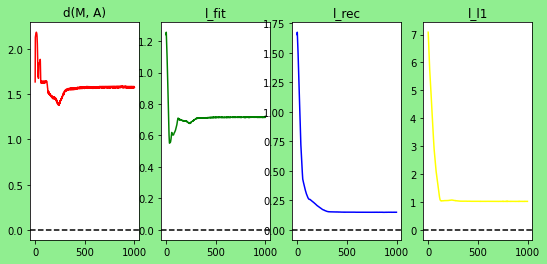

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


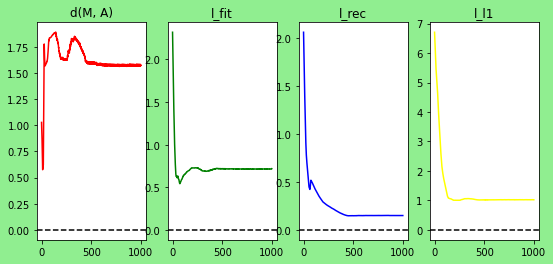

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


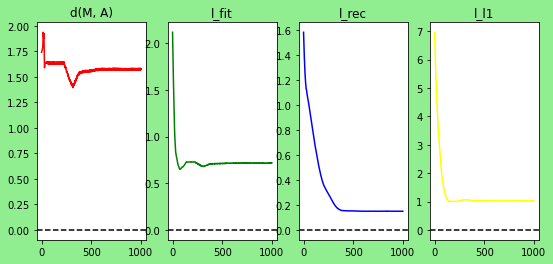

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


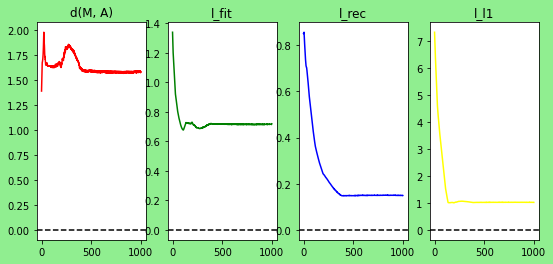

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


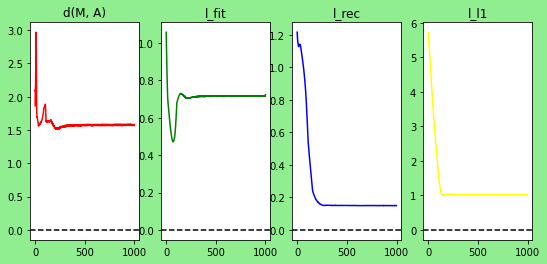

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


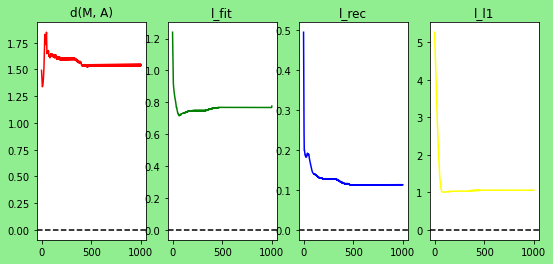

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


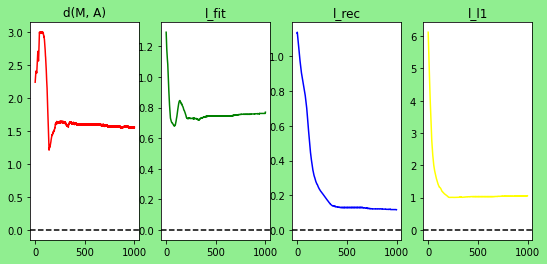

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


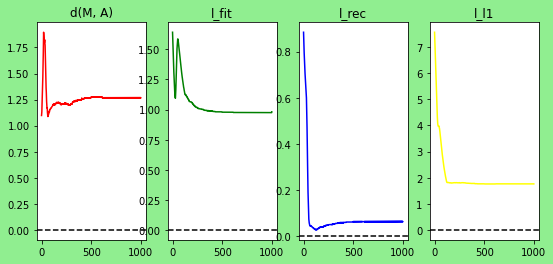

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


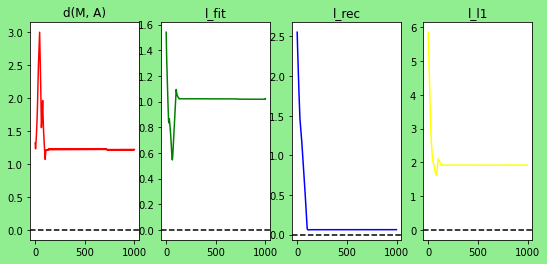

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


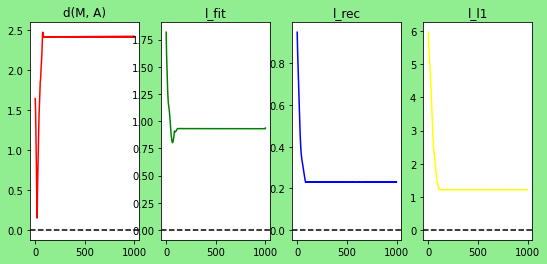

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


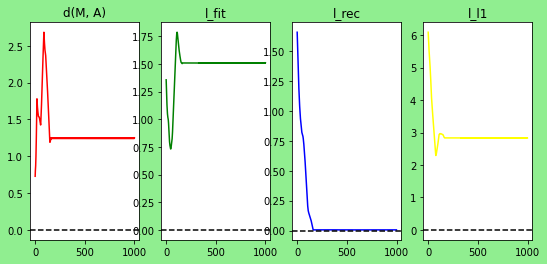

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


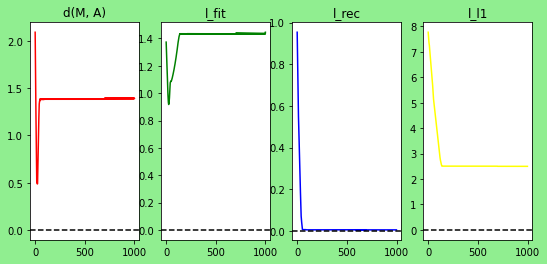

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


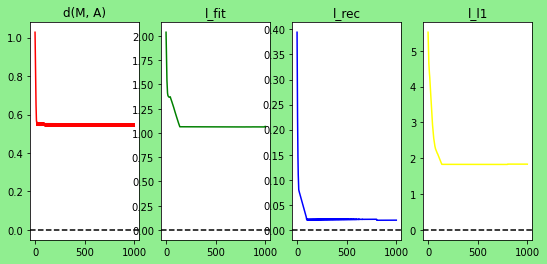

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


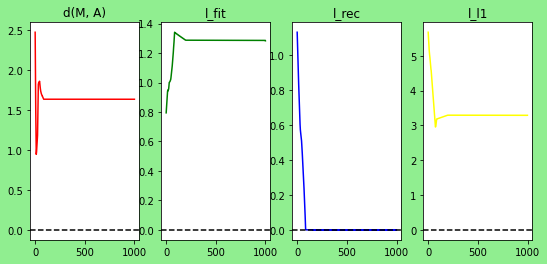

{'step.l1_coeff': 0.4641588833612782, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


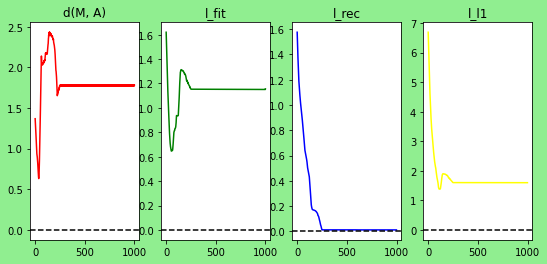

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


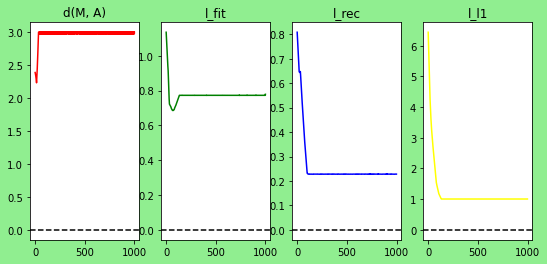

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


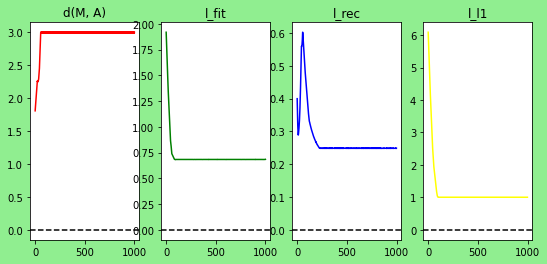

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


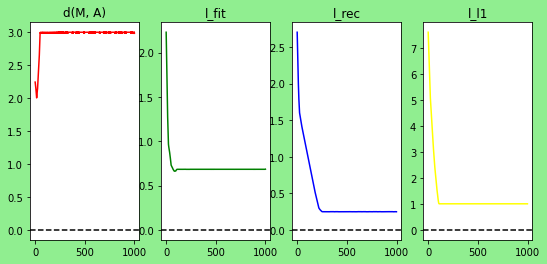

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


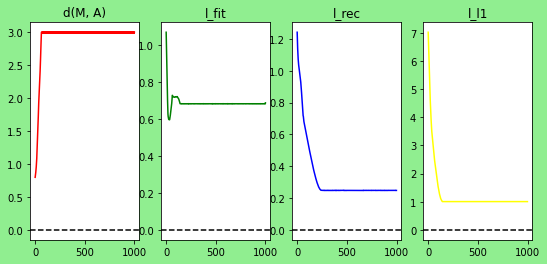

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


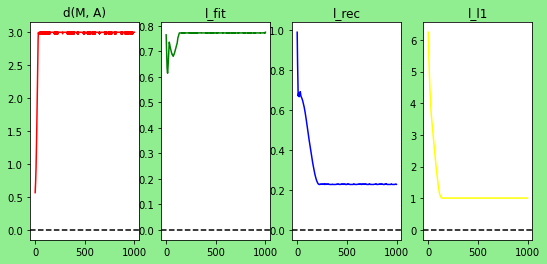

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


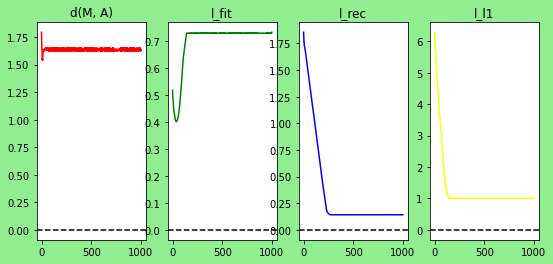

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


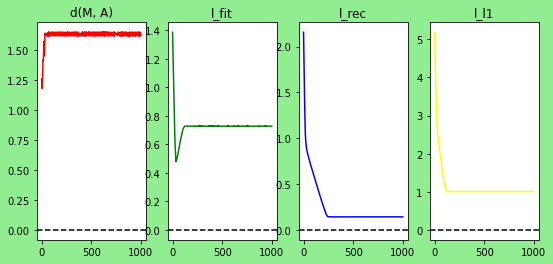

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


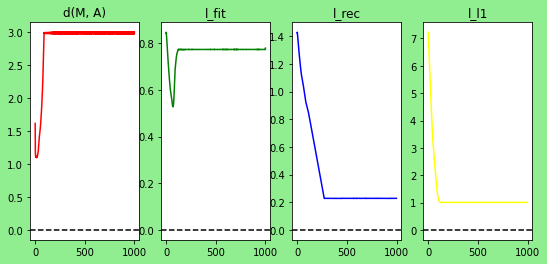

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


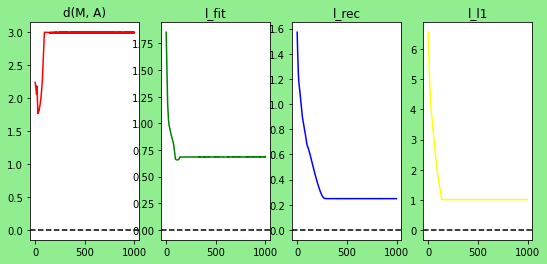

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


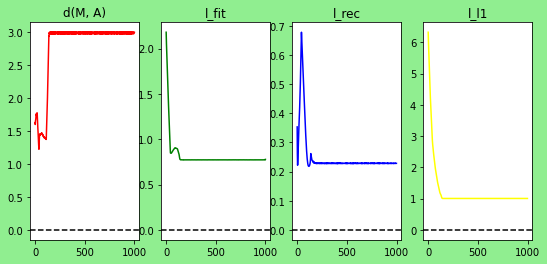

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


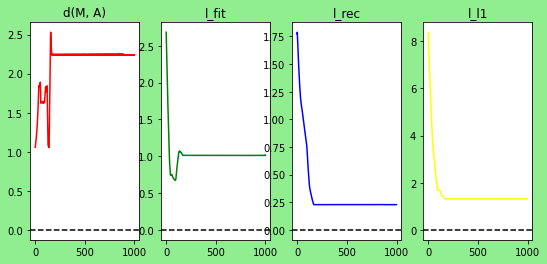

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


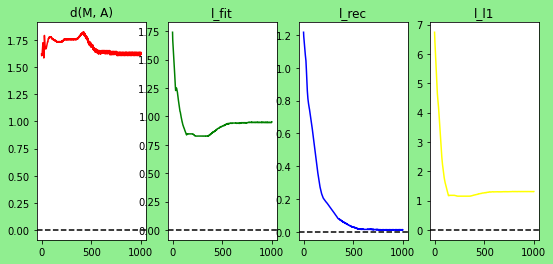

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


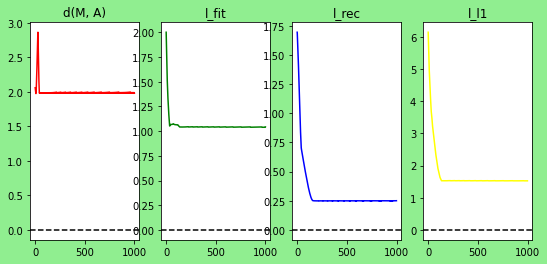

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


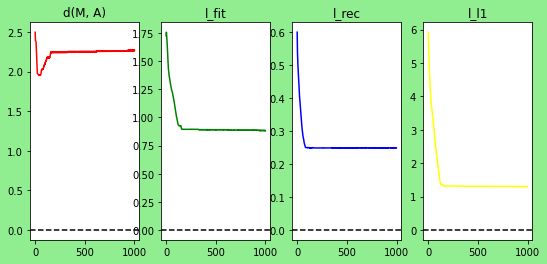

{'step.l1_coeff': 2.782559402207126, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


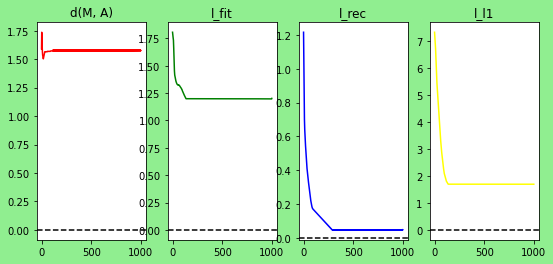

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


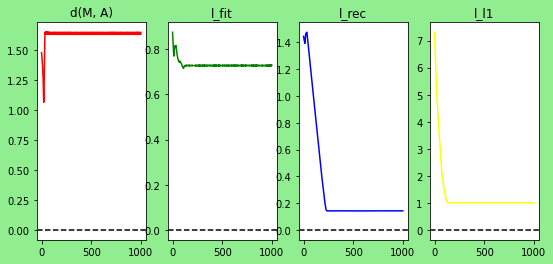

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


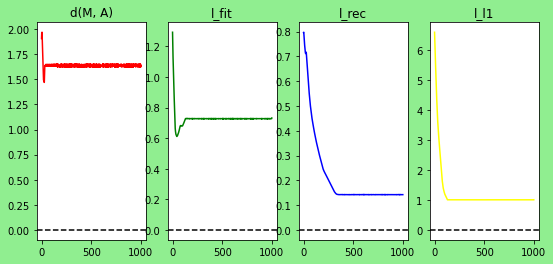

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


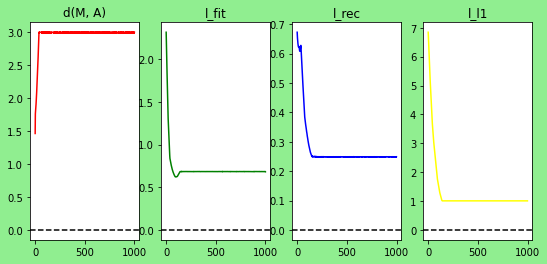

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


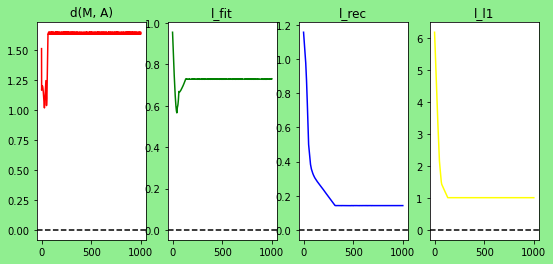

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


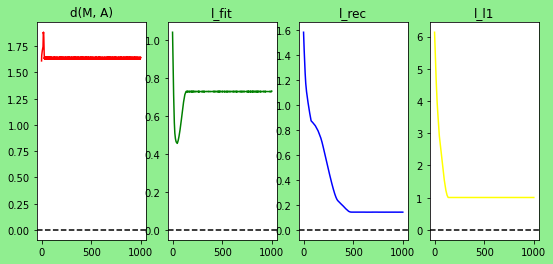

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


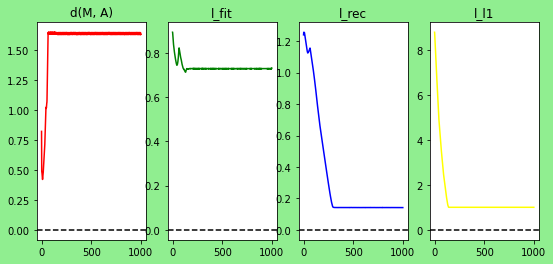

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


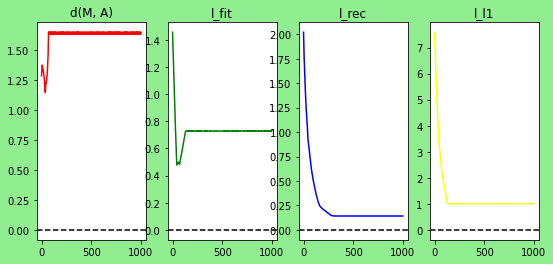

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


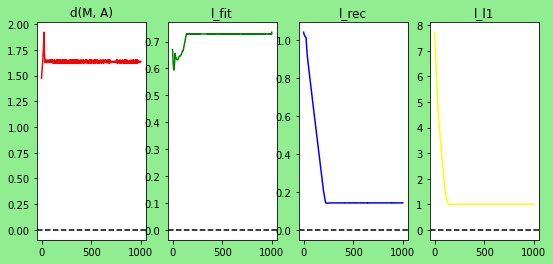

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


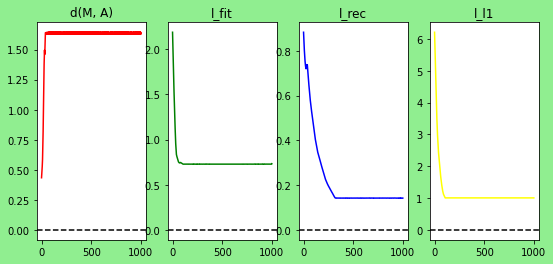

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


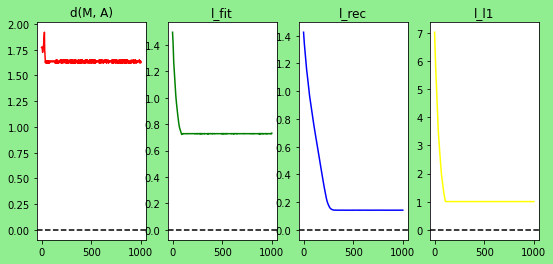

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


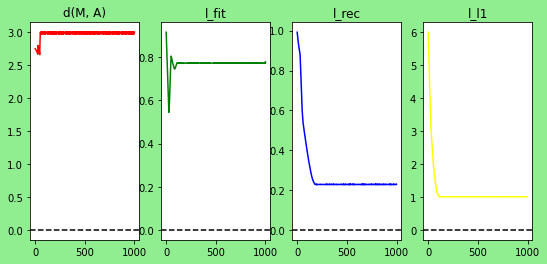

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


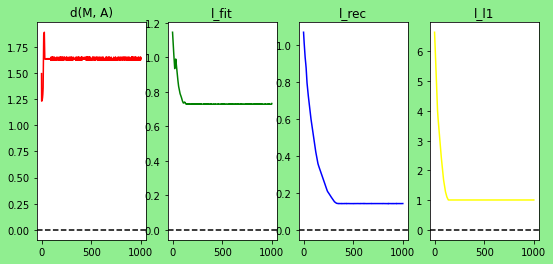

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


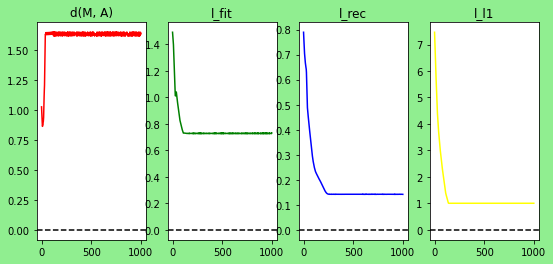

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


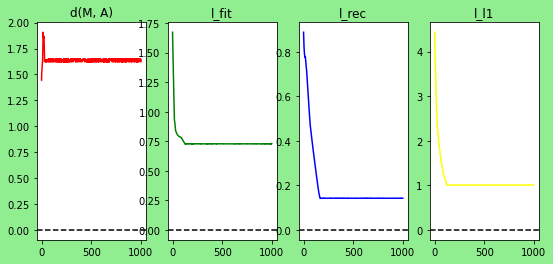

{'step.l1_coeff': 16.68100537200059, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


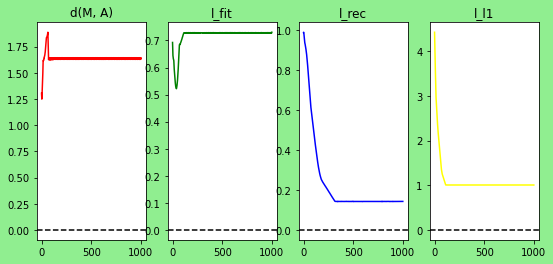

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


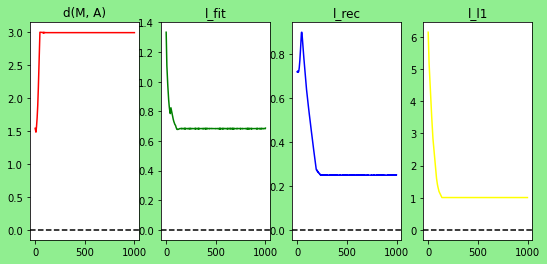

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


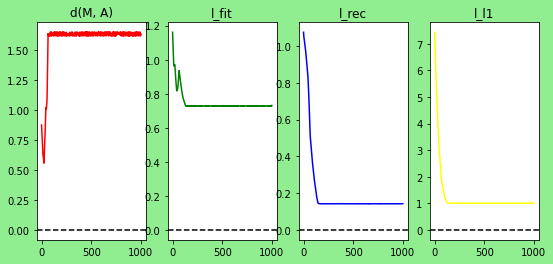

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


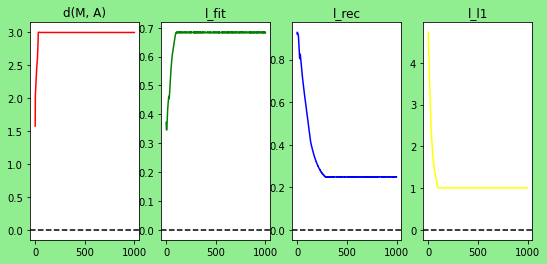

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


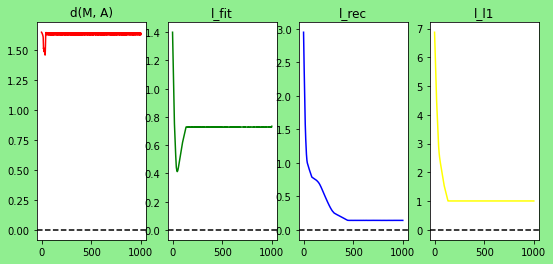

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 1.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


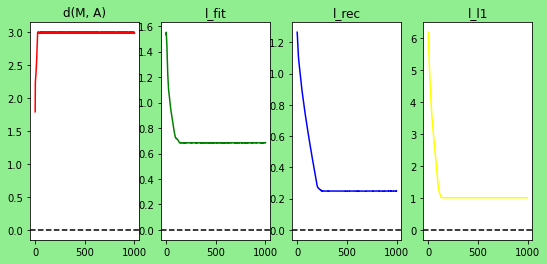

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


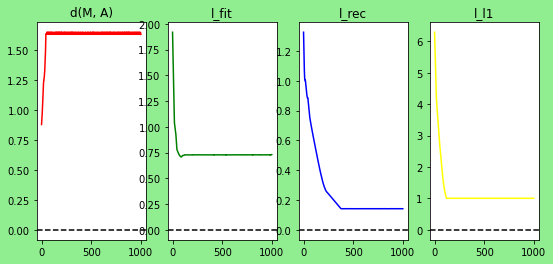

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


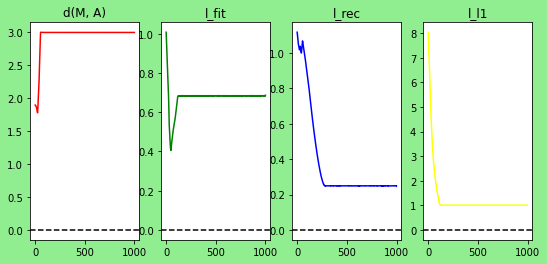

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


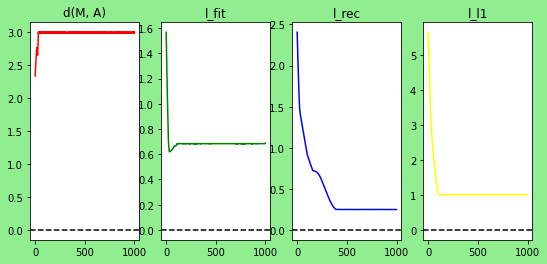

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


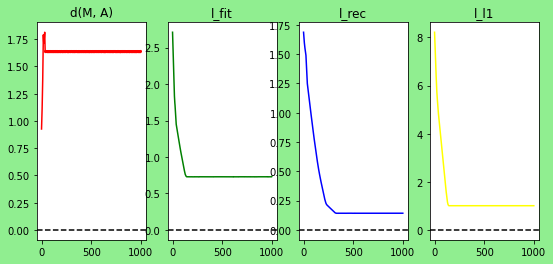

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 3.1622776601683795, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


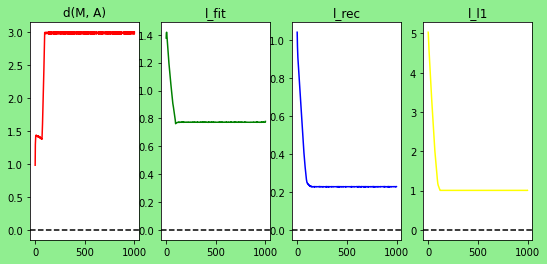

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 0, 'name': 'sweep-02'}


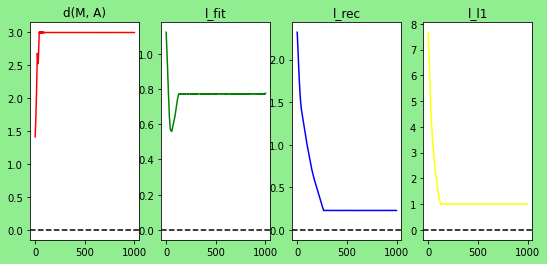

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 1, 'name': 'sweep-02'}


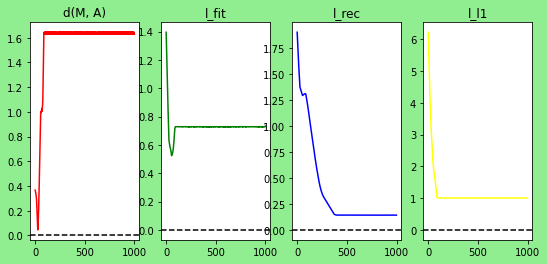

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 2, 'name': 'sweep-02'}


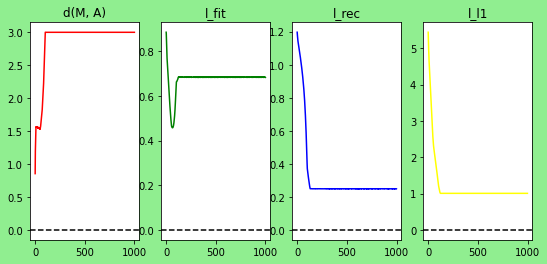

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 3, 'name': 'sweep-02'}


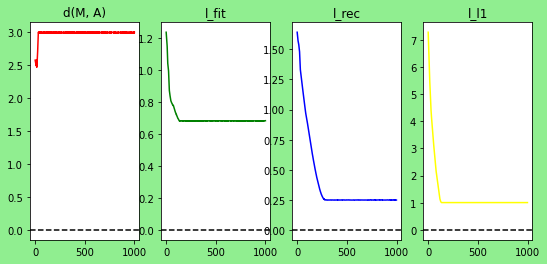

{'step.l1_coeff': 100.0, 'step.l_rec_coeff': 10.0, 'get_results.batch_size': 128, 'repetitions': 4, 'name': 'sweep-02'}


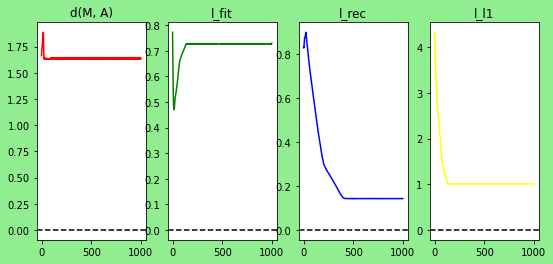

In [15]:
# show all results
for p, r in zip(all_params, results):
    process_results(r, str(p))

In [22]:
def quality_metric_last_l_fit(res):
    """Scalar quality metric: last fit loss."""
    #print(res)
    return res[1][0]['l_fit'][-1]

quality_metric_last_l_fit.title = "l_fit"

def quality_metric_last_l_rec(res):
    """Scalar quality metric: last rec loss."""
    #print(res)
    return res[1][0]['l_rec'][-1]

quality_metric_last_l_rec.title = "l_rec"

def quality_metric_last_l_l1(res):
    """Scalar quality metric: last rec loss."""
    #print(res)
    return res[1][0]['l_l1'][-1]

quality_metric_last_l_l1.title = "l_l1"

def quality_metric_last_de(res):
    """Scalar quality metric: last rec loss."""
    #print(res)
    return res[1][1][-1]

quality_metric_last_de.title = "de"

def quality_metric_combined(res):
    """Combined metric."""
    return max(quality_metric_last_l_fit(res), quality_metric_last_l_rec(res))
quality_metric_combined.title = "combined"

In [17]:
def plot_3d(metric):
    """Plot a metric in 3d."""
    # preparing data for the 3d plot
    X, Y, Z = [], [], []
    Xm, Ym, Zm = [], [], []
    Pm = []

    for p1 in sweep[param_1]:
        for p2 in sweep[param_2]:
            R = filter_results(**{param_1: p1, param_2: p2})
            for r in R:
                X.append(p1)
                Y.append(p2)
                Z.append(metric(r))
            Xm.append(p1)
            Ym.append(p2)
            Zm.append(np.median([metric(r) for r in R]))
            Pm.append((p1, p2))

    # Doing 3d plot

    # Configure the trace.
    trace1 = go.Mesh3d(x=Xm, y=Ym, z=Zm, opacity=0.5)

    # Configure the trace.
    trace2 = go.Scatter3d(x=X, y=Y, z=Z, opacity=0.5, mode='markers',
        marker={'size': 10, 'opacity': 0.8}
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
    )

    data = [trace1, trace2]

    plot_figure = go.Figure(data=data, layout=layout)

    plot_figure.update_layout(scene = dict(xaxis_title=param_1,
                        yaxis_title=param_2,
                        zaxis_title=metric.title,
                        xaxis_type="log", yaxis_type="log"),
                        width=700,
                        margin=dict(r=20, b=10, l=10, t=10))


    # Render the plot.
    plotly.offline.iplot(plot_figure)
    
    return Zm, Pm

In [18]:
# l1rec now working??? well, yeah I use a custom training procedure...
Zm, Pm = plot_3d(quality_metric_combined)

In [23]:
# l1rec now working??? well, yeah I use a custom training procedure...
Zm, Pm = plot_3d(quality_metric_last_l_l1)

In [19]:
# l1rec now working??? well, yeah I use a custom training procedure...
Zm, Pm = plot_3d(quality_metric_last_de)

In [24]:
idx = np.argmin(Zm)
P = Pm[idx]
print("%s=%.2f, %s=%.2f metric=%.2f" % (param_1, P[0], param_2, P[1], Zm[idx]))

step.l_rec_coeff=1.00, step.l1_coeff=2.78 metric=1.01


In [25]:
# best parameters
best_param_idx = all_params.index(filter_results(**{param_1: P[0], param_2: P[1]})[0][0])
best_param = all_params[best_param_idx]

# RESULTS

`sweep_00`: best hyperparams l_rec_coeff=1, batch_size=256
`sweep_01`: works OK if bs <= 200 and l_re >= 1

# Manual computation

In [26]:
import tensorflow as tf
tf.compat.v1.enable_v2_behavior()
import synthetic_experiment

1000/1000 [==============================] - 0s 40us/sample - loss: 1.5248e-11
1.5248112258947622e-11
[<tf.Variable 'sequential/dense/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[ 9.9999964e-01,  1.5723221e-07],
       [-4.0634625e-08,  1.0000001e+00],
       [ 9.9999833e-01,  2.8211952e-07],
       [ 6.8811872e-08,  9.9999458e-01]], dtype=float32)>, <tf.Variable 'sequential/dense/bias:0' shape=(2,) dtype=float32, numpy=array([ 4.2214836e-08, -1.9838981e-07], dtype=float32)>]
8.118588105787694e-06


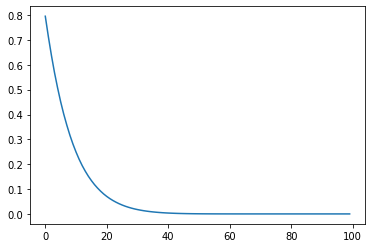

In [27]:
synthetic_experiment.fit_test_model(xs, ys, A)

In [28]:
best_param = all_params[0]
set_params(best_param, synthetic_experiment)
best_param

{'step.l1_coeff': 1e-05,
 'step.l_rec_coeff': 1.0,
 'get_results.batch_size': 128,
 'repetitions': 0,
 'name': 'sweep-02'}

In [29]:
# getting results manually
res = synthetic_experiment.get_results(xs_e, ys_e, Q1)

best


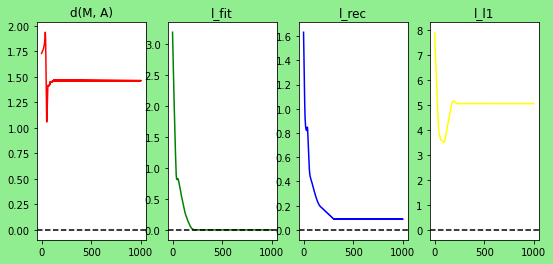

In [30]:
process_results(res, "best")

In [31]:
pickle.dump(results, open('results_%s.pkl' % sweep['name'][0], 'wb'))